In [4]:
!pip3 install scikit-image

     |████████████████████████████████| 30.4MB 10.7MB/s eta 0:00:01     |██████████████████████▎         | 21.2MB 12.2MB/s eta 0:00:01
     |████████████████████████████████| 4.3MB 13.3MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/1a/de/f7f985018f462ceeffada7f6e609919fbcc934acd9301929cba14bc2c24a/imageio-2.6.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/41/8f/dd6a8e85946def36e4f2c69c84219af0fa5e832b018c970e92f2ad337e45/networkx-2.4-py3-none-any.whl


In [1]:
from skimage import io
from skimage import transform
from matplotlib import pyplot as plt

img = io.imread("/Users/a.morvan/Downloads/267861f12e1dedbeaaf17098c3ec4cd4.jpg", as_gray=True)
plt.imshow(img)
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
integral_img = transform.integral.integral_image(img.reshape(1, -1))

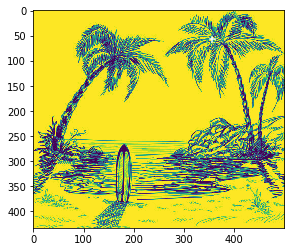

In [3]:
import numpy as np

def dichotomy_search(begin, end, array, searched):
    if begin + 1 == end or begin == end:
        return begin

    middle = int((begin + end) / 2)
    found_value = array[middle]

    if searched == found_value:
        return middle
    elif searched < found_value:
        return dichotomy_search(begin, middle, array, searched)
    else:
        return dichotomy_search(middle, end, array, searched)

def sample_point_from_image(flattened_):

    searched_value = np.random.randint(0, flattened_[-1])
    value = dichotomy_search(0, len(flattened_) - 1, flattened_, searched_value)

    i = int(value / img.shape[1])
    j = int(value - i * img.shape[1])
    
    return (j, i)

integral_img = transform.integral.integral_image(img.reshape(1, -1))
flattened = integral_img.flatten()
j, i = sample_point_from_image(flattened)
    
plt.imshow(img)
plt.plot([j-5, j+5], [i,  i], color="white")
plt.plot([j, j], [i - 5,  i + 5], color="white")
plt.show()

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[   0    0    0 ... 9034 9034 9034]


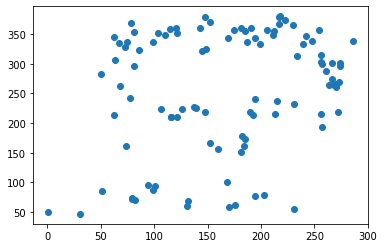

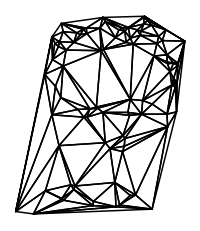

In [48]:
from pyhull.delaunay import DelaunayTri
from skimage import feature

def plot_vertice(a, b, c, points):
    x1, y1 = points[a]
    x2, y2 = points[b]
    x3, y3 = points[c]
    plt.plot([x1, x2, x3, x1], [y1, y2, y3, y1], color="black")

island_fname = "267861f12e1dedbeaaf17098c3ec4cd4"
pandas_fname = "500_F_144526637_NJ2q8fZn9GR7ZaiJjKoa8yRcbysuDZyR"
face_fname = "m_sexy_gr"


img = io.imread(f"/Users/a.morvan/Downloads/{face_fname}.jpg", as_gray=True)

nb_points = 100


#my_img = (np.ones_like(img) - img) ** 2
my_img = feature.canny(img, sigma=0.6)
print(my_img)
integral_img = transform.integral.integral_image((my_img).reshape(1, -1))
flattened = integral_img.flatten()

print(flattened)

points = list()


for _ in range(nb_points):
    j, i = sample_point_from_image(flattened)
    points.append((img.shape[1] - j, img.shape[0] - i))

plt.scatter(*zip(*points))
fig = plt.figure()

tri = DelaunayTri(points)
for tuple_ in tri.vertices:
    plot_vertice(*tuple_, points)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
fig.savefig("face_delaunay.svg")

In [ ]:
plt.imshow(img)

In [ ]:
from skimage import feature
canny_img = feature.canny(img, sigma=0.00)
plt.imshow(canny_img)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[   0    0    0 ... 8799 8799 8799]


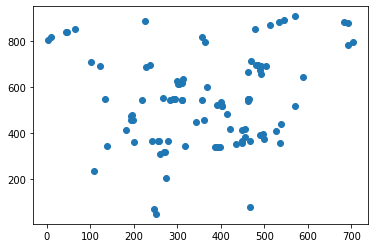

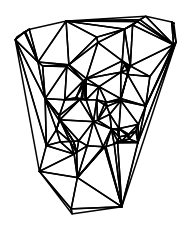

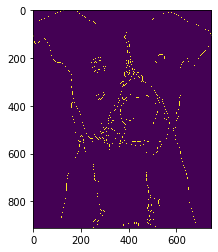

In [89]:
dragon_fnmae = "dog_head"

img = io.imread(f"/Users/a.morvan/Downloads/{dragon_fnmae}.png", as_gray=True)

nb_points = 300


#my_img = (np.ones_like(img) - img) ** 2
my_img = feature.canny(img, sigma=2.5)
print(my_img)
integral_img = transform.integral.integral_image((my_img).reshape(1, -1))
flattened = integral_img.flatten()



print(flattened)

points = list()


for _ in range(nb_points):
    j, i = sample_point_from_image(flattened)
    if int(my_img[i, j]) == 0:
        continue
    points.append((img.shape[1] - j, img.shape[0] - i))

plt.scatter(*zip(*points))
fig = plt.figure()

tri = DelaunayTri(points)
for tuple_ in tri.vertices:
    plot_vertice(*tuple_, points)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.figure()
plt.imshow(my_img)